In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Loading CSV files
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [89]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [90]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [91]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [92]:
# Displaying information and summary for Customers.csv
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [93]:
# Displaying information and summary for Products.csv
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [94]:
# Displaying information and summary for Transactions.csv
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [95]:
# Check for null values in Customers.csv
print("Null Values in Customers.csv\n",customers_df.isnull().sum())

# Check for null values in Products.csv
print("Null Values in Products.csv\n",products_df.isnull().sum())

# Check for null values in Transactions.csv
print("Null Values in Transactions.csv\n",transactions_df.isnull().sum())


Null Values in Customers.csv
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Null Values in Products.csv
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Null Values in Transactions.csv
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [96]:
# Check for duplicates in each dataframe

print("Duplicates in Customers.csv :",customers_df.duplicated().sum())

print("Duplicates in Products.csv :",products_df.duplicated().sum())

print("Duplicates in Transactions.csv :",transactions_df.duplicated().sum())

Duplicates in Customers.csv : 0
Duplicates in Products.csv : 0
Duplicates in Transactions.csv : 0


In [97]:
# Merge Products and Transactions on ProductID
merged_data = pd.merge(transactions_df, products_df, on='ProductID', how='left')

# Merge the combined dataset with Customers on CustomerID
merged_data = pd.merge(merged_data, customers_df, on='CustomerID', how='left')

# Display the first few rows of the merged dataset
print("=== Merged Data Preview ===")
print(merged_data.head())

=== Merged Data Preview ===
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea

In [98]:
# Total spending by each CustomerID
customer_spending = transactions_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count')
).reset_index()

# Merging with Customers data to get customer details
customer_spending = pd.merge(customer_spending, customers_df[['CustomerID', 'CustomerName', 'Region']], on='CustomerID', how='left')

print("=== Total Spending by Customer ===")
print(customer_spending.sort_values(by='total_spent', ascending=False).head())

=== Total Spending by Customer ===
    CustomerID  total_spent  total_transactions   CustomerName         Region
140      C0141     10673.87                  10   Paul Parsons         Europe
53       C0054      8040.39                   8   Bruce Rhodes           Asia
64       C0065      7663.70                  10   Gerald Hines  North America
155      C0156      7634.45                  11  William Adams  North America
81       C0082      7572.91                   7   Aimee Taylor  South America


In [99]:
# Total spending by each CustomerID
customer_spending = transactions_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count')
).reset_index()

# Merging with Customers data to get customer details
customer_spending = pd.merge(customer_spending, customers_df[['CustomerID', 'CustomerName', 'Region']], on='CustomerID', how='left')

print("=== Total Spending by Customer ===")
print(customer_spending.sort_values(by='total_spent', ascending=False).head())


=== Total Spending by Customer ===
    CustomerID  total_spent  total_transactions   CustomerName         Region
140      C0141     10673.87                  10   Paul Parsons         Europe
53       C0054      8040.39                   8   Bruce Rhodes           Asia
64       C0065      7663.70                  10   Gerald Hines  North America
155      C0156      7634.45                  11  William Adams  North America
81       C0082      7572.91                   7   Aimee Taylor  South America


In [100]:
# Total sales by Product Category
category_sales = products_sales.groupby('Category').agg(
    total_sales_revenue=('total_sales_revenue', 'sum'),
    total_quantity_sold=('total_quantity_sold', 'sum')
).reset_index()

print("=== Total Sales by Product Category ===")
print(category_sales.sort_values(by='total_sales_revenue', ascending=False))

=== Total Sales by Product Category ===
      Category  total_sales_revenue  total_quantity_sold
0        Books            192147.47                  681
2  Electronics            180783.50                  627
1     Clothing            166170.66                  590
3   Home Decor            150893.93                  639


In [101]:
# Total spending by Region
region_sales = customer_spending.groupby('Region').agg(
    total_sales_revenue=('total_spent', 'sum'),
    total_customers=('CustomerID', 'count')
).reset_index()

print("=== Total Sales by Region ===")
print(region_sales.sort_values(by='total_sales_revenue', ascending=False).head())

=== Total Sales by Region ===
          Region  total_sales_revenue  total_customers
3  South America            219352.56               59
1         Europe            166254.63               50
2  North America            152313.40               46
0           Asia            152074.97               44


In [102]:
# Distinct values in Products dataset
print("=== Distinct Values in Products Dataset ===")
print("Distinct Product Names:", products_df['ProductName'].nunique())
print("Distinct Product Categories:", products_df['Category'].nunique())

# Distinct values in Customers dataset
print("\n=== Distinct Values in Customers Dataset ===")
print("Distinct Regions:", customers_df['Region'].nunique())


=== Distinct Values in Products Dataset ===
Distinct Product Names: 66
Distinct Product Categories: 4

=== Distinct Values in Customers Dataset ===
Distinct Regions: 4


## Data Visualization

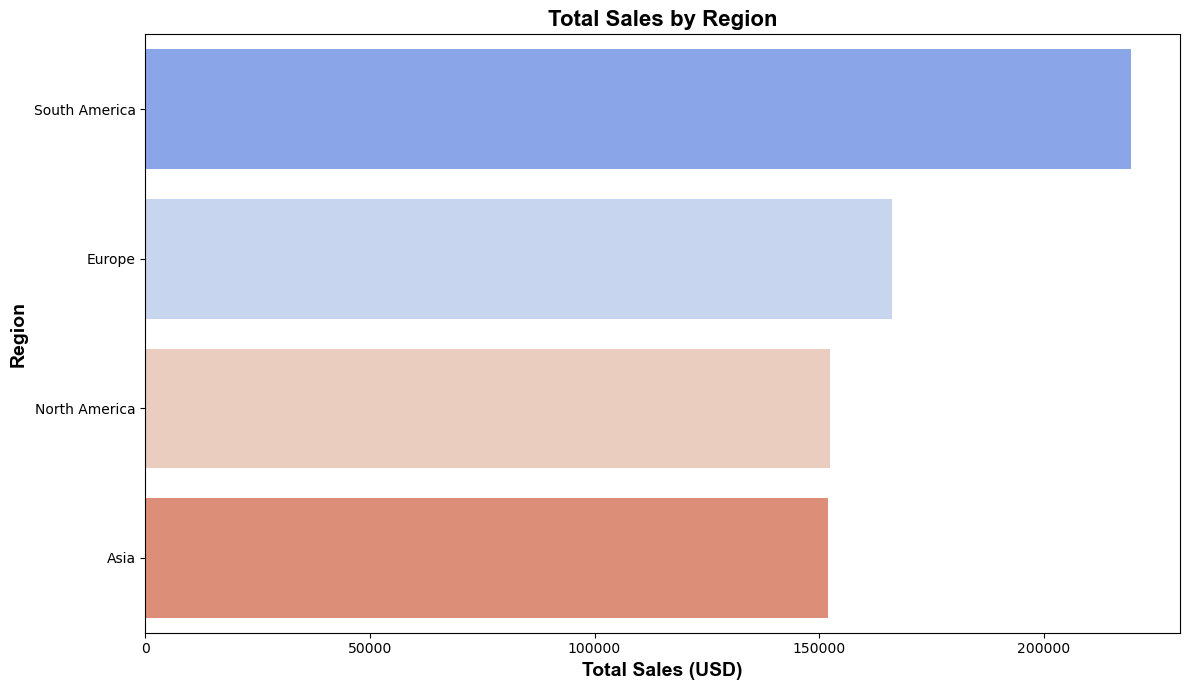

In [128]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().reset_index()

sales_by_region = sales_by_region.sort_values('TotalValue', ascending=False)

plt.figure(figsize=(12, 7))

sns.barplot(x='TotalValue', y='Region', data=sales_by_region, palette='coolwarm')

plt.title('Total Sales by Region', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Total Sales (USD)', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('Region', fontsize=14, fontweight='bold', family='Arial')

plt.tight_layout()
plt.show()

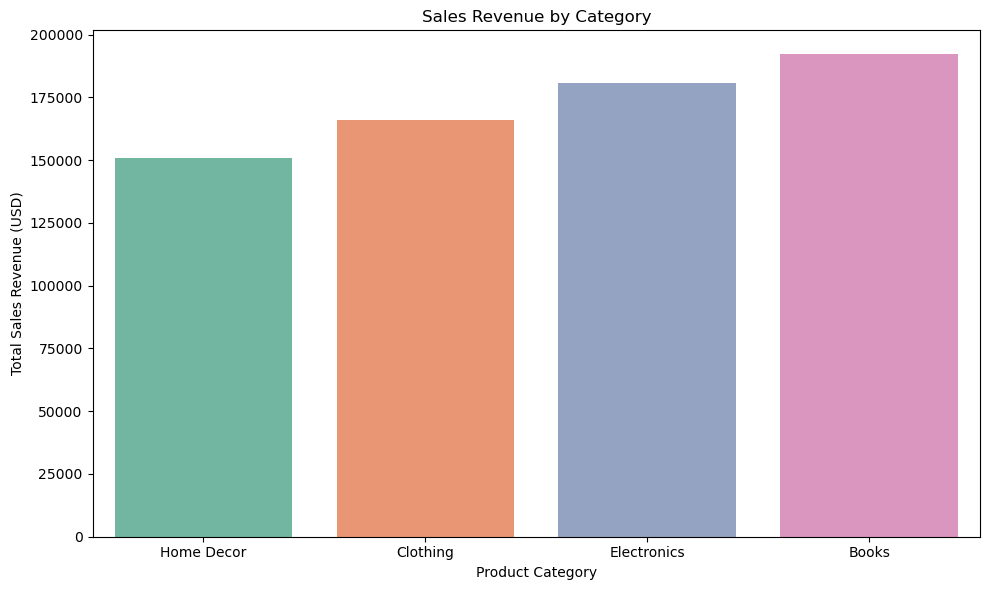

In [112]:
category_sales = transactions_df.groupby('ProductID').agg(
    total_sales_revenue=('TotalValue', 'sum')
).reset_index()

category_sales = pd.merge(category_sales, products_df[['ProductID', 'Category']], on='ProductID', how='left')

category_sales_grouped = category_sales.groupby('Category').agg(
    total_sales_revenue=('total_sales_revenue', 'sum')
).reset_index()

category_sales_sorted = category_sales_grouped.sort_values('total_sales_revenue', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='total_sales_revenue', data=category_sales_sorted, palette='Set2')

plt.title('Sales Revenue by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Revenue (USD)')
plt.tight_layout()
plt.show()


C:\Users\shekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shekh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


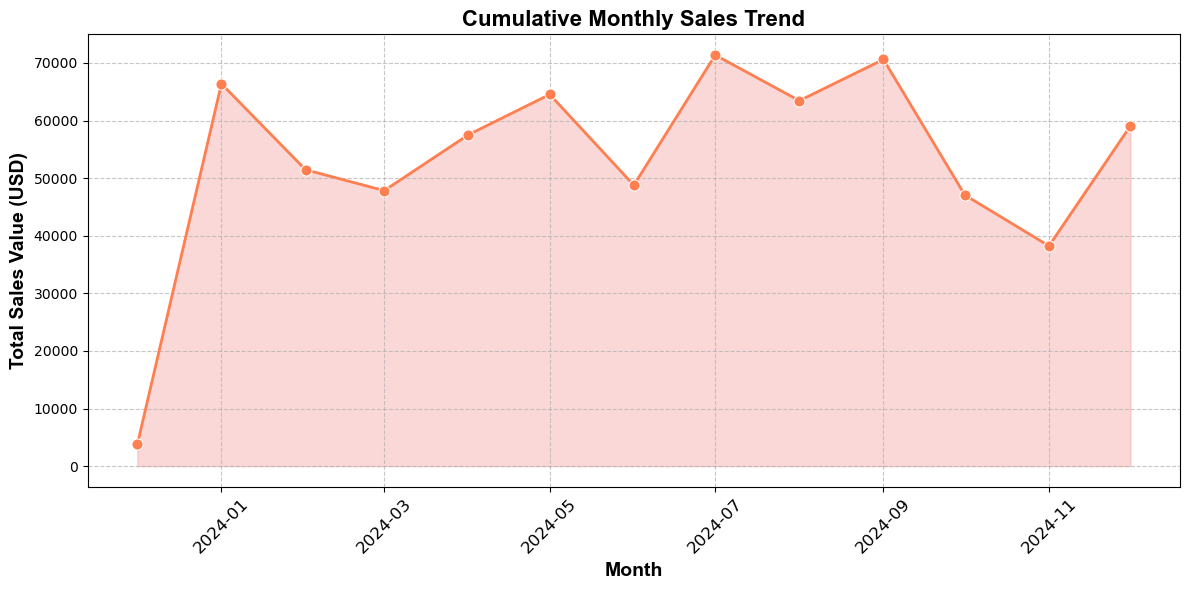

In [129]:
if sales_by_month['YearMonth'].dtype == 'period[M]':  
    sales_by_month['YearMonth'] = sales_by_month['YearMonth'].dt.to_timestamp()

sales_by_month['TotalValue'] = pd.to_numeric(sales_by_month['TotalValue'], errors='coerce')

plt.figure(figsize=(12, 6))

sns.lineplot(x='YearMonth', y='TotalValue', data=sales_by_month, marker='o', color='coral', linewidth=2, markersize=8)

plt.fill_between(sales_by_month['YearMonth'], sales_by_month['TotalValue'], alpha=0.3, color='lightcoral')

plt.title('Cumulative Monthly Sales Trend', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Month', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('Total Sales Value (USD)', fontsize=14, fontweight='bold', family='Arial')

plt.xticks(rotation=45, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

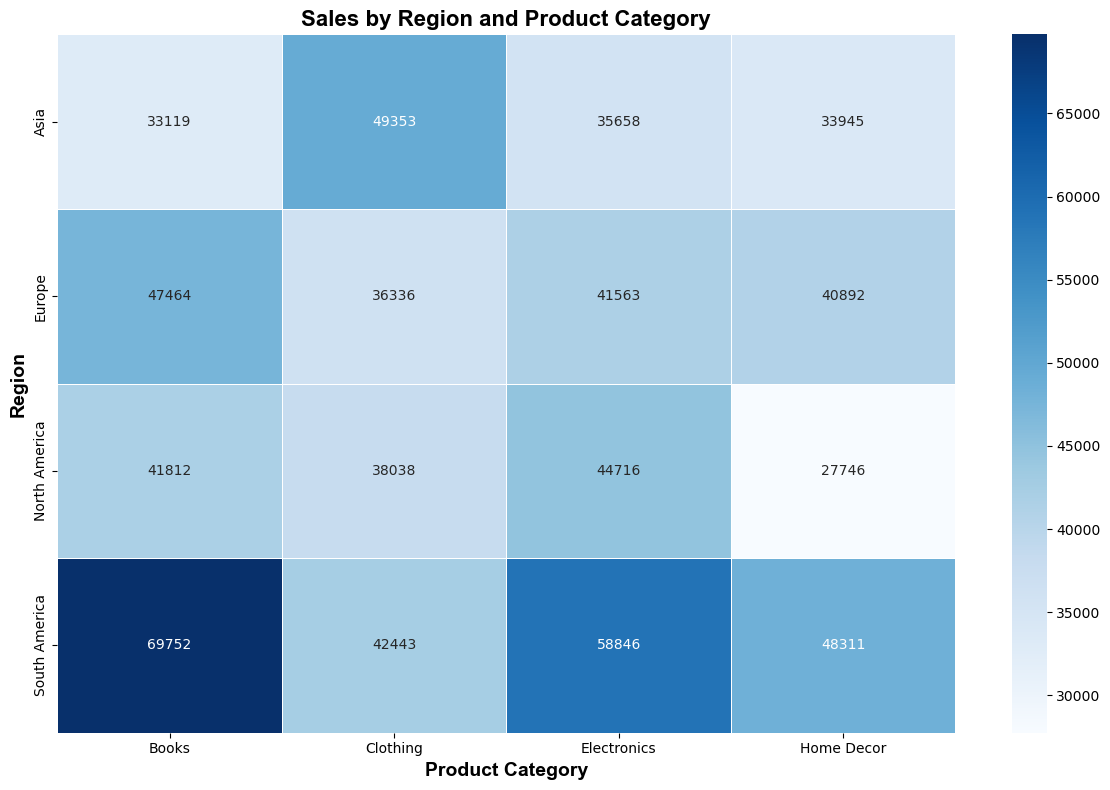

In [133]:
merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='inner')
merged_df = pd.merge(merged_df, customers_df, on='CustomerID', how='inner')

region_sales_data = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_sales_data, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title('Sales by Region and Product Category', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Product Category', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('Region', fontsize=14, fontweight='bold', family='Arial')
plt.tight_layout()
plt.show()

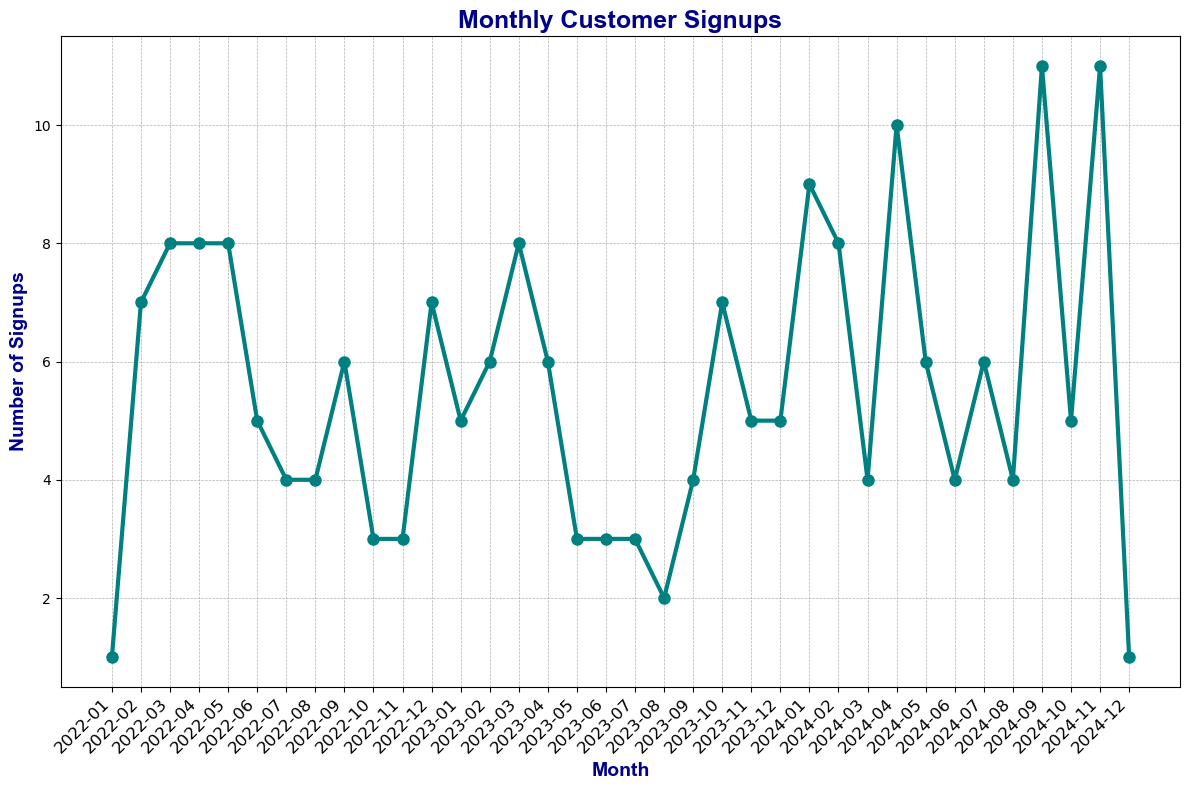

In [144]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Step 2: Extract year and month from the 'SignupDate'
customers_df['YearMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Step 3: Group by Year-Month and count the number of signups
monthly_signups = customers_df.groupby('YearMonth').size()

# Step 4: Plotting the monthly signups using a line graph
plt.figure(figsize=(12, 8))

# Set a smoother line style, change color, and add markers for each data point
plt.plot(monthly_signups.index.astype(str), monthly_signups.values, marker='o', color='teal', markersize=8, linewidth=3, linestyle='-', label="Monthly Signups")

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding labels and title with custom font
plt.title('Monthly Customer Signups', fontsize=18, fontweight='bold', family='Arial', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold', family='Arial', color='darkblue')
plt.ylabel('Number of Signups', fontsize=14, fontweight='bold', family='Arial', color='darkblue')

# Rotate the x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to make sure nothing is clipped
plt.tight_layout()

# Show the plot
plt.show()

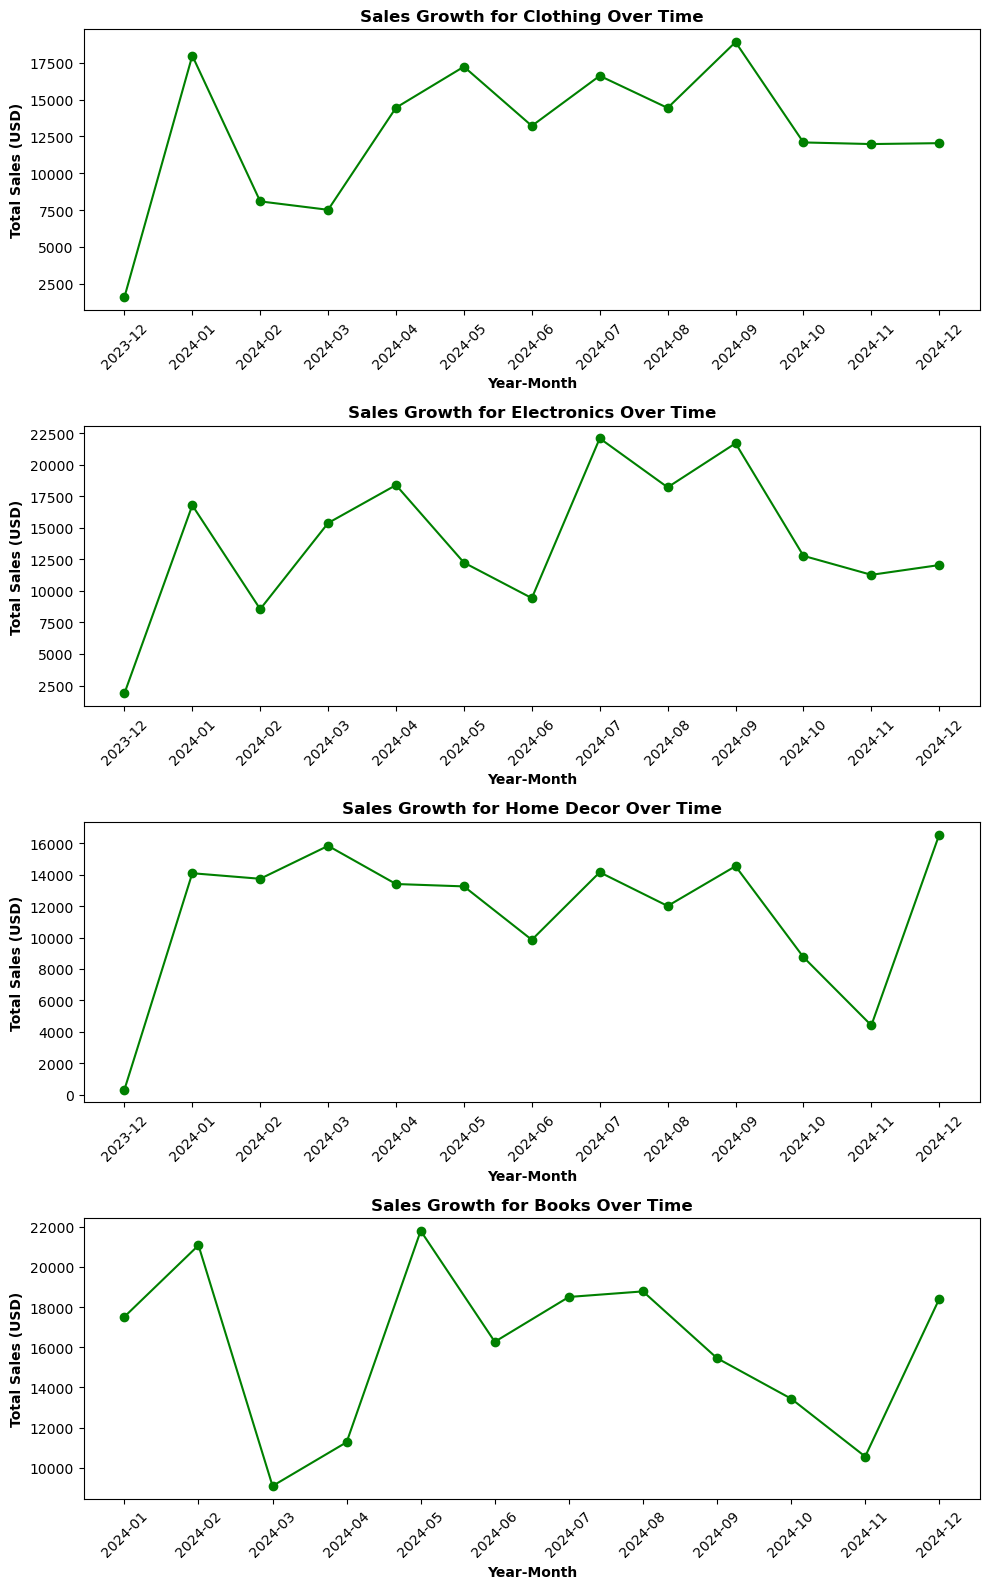

In [163]:
# Merge Transactions with Products to get product categories
merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='inner')

# Convert 'TransactionDate' to datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Extract Year-Month from TransactionDate
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Aggregate total sales by category and Year-Month
category_sales = merged_df.groupby(['YearMonth', 'Category'])['TotalValue'].sum().reset_index()

# Get unique categories
categories = category_sales['Category'].unique()

# Create subplots, one for each category
num_categories = len(categories)
fig, axes = plt.subplots(num_categories, 1, figsize=(10, 4 * num_categories))  # Smaller figsize

# Loop through each category and plot the data
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = category_sales[category_sales['Category'] == category]
    
    # Plot on the corresponding subplot
    axes[i].plot(category_data['YearMonth'].astype(str), category_data['TotalValue'], marker='o', label=category, color='green')
    
    # Adding labels and title for each subplot
    axes[i].set_title(f'Sales Growth for {category} Over Time', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year-Month', fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Total Sales (USD)', fontsize=10, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout to make it more readable
plt.tight_layout()

# Show the plot
plt.show()

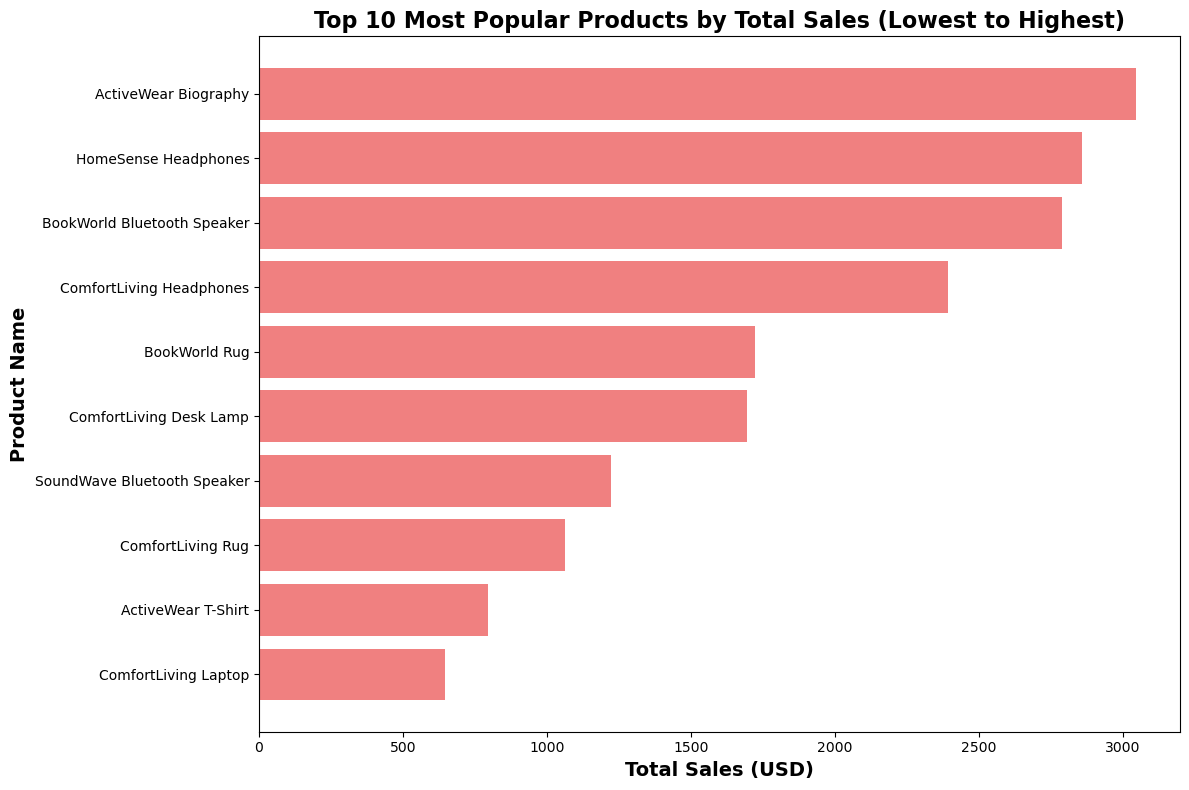

In [172]:
# Merge Transactions with Products to get product names
merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='inner')

# Aggregate total sales by ProductName
product_sales = merged_df.groupby('ProductName')['TotalValue'].sum().reset_index()

# Sort products by TotalValue in ascending order (lowest to highest) and get the top 10
top_10_products_reverse = product_sales.sort_values(by='TotalValue', ascending=True).head(10)

# Plotting the top 10 most popular products by total sales (reverse order)
plt.figure(figsize=(12, 8))
plt.barh(top_10_products_reverse['ProductName'], top_10_products_reverse['TotalValue'], color='lightcoral')

# Adding labels and title
plt.title('Top 10 Most Popular Products by Total Sales (Lowest to Highest)', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Product Name', fontsize=14, fontweight='bold')


# Show the plot
plt.tight_layout()
plt.show()